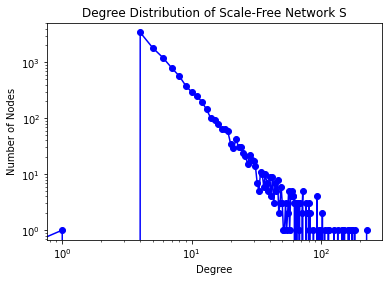

The node with the highest degree is 43 with degree 224, entered the network at time interval 1


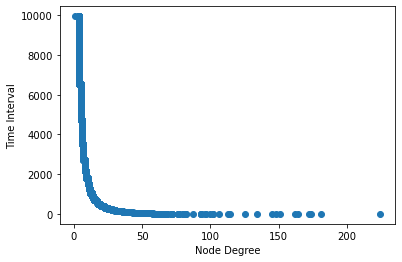

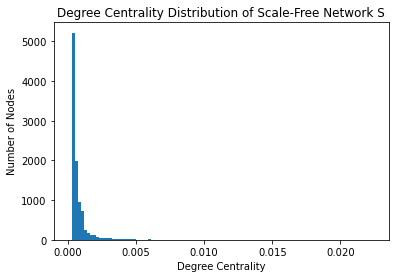

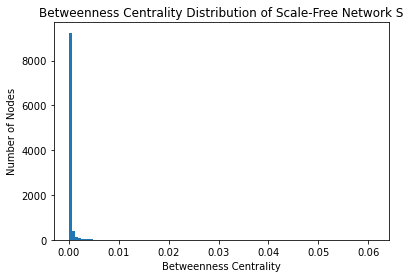

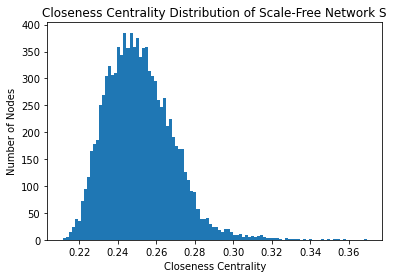

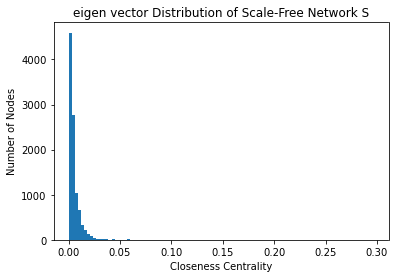

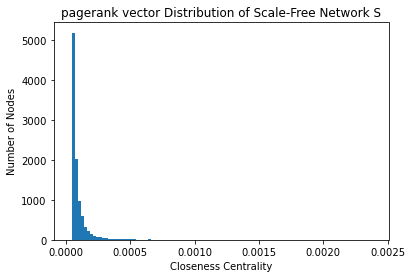

Giant Component Size: 10000
Total Nodes in S: 10000
Ratio of Nodes in Giant Component to S: 1.0

 for probabability 0.25  =   17730.5
 for probabability 0.5  =   19340.4
 for probabability 0.75  =   13301.0
 for probabability 1  =   9999.0


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random


#empty graph
S = nx.Graph()

# Add 50 nodes to the graph
S.add_nodes_from(range(50))

# Add edges randomnly to the network so that each node has at least degree one
while min(dict(S.degree()).values()) < 1:
    # Select two nodes at random
    node1, node2 = np.random.choice(S.nodes(), size=2, replace=False)
    
    # Add an edge between the two nodes
    S.add_edge(node1, node2)

# initial parameters for BA model
m = 4  # Number of edges added at each time step
N = 10000  # Number of nodes in the final network


    
while len(S) < N:

    nodes = list(S.nodes())
    degrees = np.array([S.degree(node) for node in nodes])
    probs = degrees / sum(degrees)#probability to be selected is depending on the degree ---> preferential attachment
    chosen_nodes = np.random.choice(nodes, size=m, replace=False, p=probs)
    
    # Adding new node with edges to the netwrok
    new_node = len(S)
    S.add_node(new_node)
    for node in chosen_nodes:
        S.add_edge(new_node, node)
    
    
# Calculate the degree distribution of the network
degree_sequence = sorted([d for n, d in S.degree()], reverse=True)
degree_counts = np.bincount(degree_sequence)

# Plot the degree distribution
plt.loglog(range(len(degree_counts)), degree_counts, 'b-', marker='o')
plt.title("Degree Distribution of Scale-Free Network S")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

  # Find the node with the highest degree
 #node, degree = max(dict(S.degree()).items(), key=lambda x: x[1])
#print(f"Node with highest degree: {node} (degree = {degree})")

# Find at what time interval the node entered the network
#time_of_entry = list(S.nodes()).index(node)
#print(f"Time interval at which node entered network: {time_of_entry}")


time_intervals = {}
for node in S.nodes():
    if node < 50:
        time_intervals[node] = 1
    else:
        time_intervals[node] = node - 49
        
max_degree = 0
max_degree_node = None
#we can narrow donwn our search for degree for maximum nodes to be in initial 50 nodes as nature of BA algorithm supports that argument 
for node, degree in S.degree(range(50)):
    if degree > max_degree:
        max_degree = degree
        max_degree_node = node
max_degree_time = time_intervals[max_degree_node]
print(f"The node with the highest degree is {max_degree_node} with degree {max_degree}, entered the network at time interval {max_degree_time}")


# Ploting  the graph for node degree vs time interval
degrees = nx.degree(S)
degree_sequence = sorted([d for n, d in degrees], reverse=True)
time_intervals_sequence = [time_intervals[n] for n, d in degrees]

plt.plot(degree_sequence, time_intervals_sequence, 'o')
plt.xlabel('Node Degree')
plt.ylabel('Time Interval')
plt.show()


# calculate centrality for each node
degree_centrality = nx.degree_centrality(S)
betweenness_centrality = nx.betweenness_centrality(S)
closeness_centrality = nx.closeness_centrality(S)
eigenvector_centrality = nx.eigenvector_centrality(S)

pagerank_centrality = nx.pagerank(S)





# plotting degree centrality vs number of node having that centrality in the network
plt.hist(list(degree_centrality.values()), bins=100)
plt.title("Degree Centrality Distribution of Scale-Free Network S")
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Nodes")
plt.show()

# plotting the betweenness centrality vs number of node having that centrality in the network
plt.hist(list(betweenness_centrality.values()), bins=100)
plt.title("Betweenness Centrality Distribution of Scale-Free Network S")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.show()

# plotting the closeness centrality vs number of node having that centrality in the network
plt.hist(list(closeness_centrality.values()), bins=100)
plt.title("Closeness Centrality Distribution of Scale-Free Network S")
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Nodes")
plt.show()

#plotting the eigen vector centrality vs number of node having that centrality in the network

plt.hist(list(eigenvector_centrality.values()), bins=100)
plt.title("eigen vector Distribution of Scale-Free Network S")
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Nodes")
plt.show()



plt.hist(list(pagerank_centrality.values()), bins=100)
plt.title("pagerank vector Distribution of Scale-Free Network S")
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Nodes")
plt.show()




#giant component in S
connected_components = list(nx.connected_components(S))
giant_component = max(connected_components, key=len)

#ratio
giant_component_size = len(giant_component)
total_nodes = len(S.nodes)
ratio = giant_component_size / total_nodes

print(f"Giant Component Size: {giant_component_size}")
print(f"Total Nodes in S: {total_nodes}")
print(f"Ratio of Nodes in Giant Component to S: {ratio}")

print()

#we have considered nodes infected with information as I and nodes to be suscepted as S.
#and each node only gets one chance to pass information to its neighbours
def si_model(p):
 #initially all nodes are susceptible    
    for node in S.nodes():
        S.nodes[node]['state'] = 'S'

# Set the source node,selected randomnly from the netwrok, to be infected
    source_node =  random.choice(list(S.nodes()))
    S.nodes[source_node]['state'] = 'I'
    infected_nodes = [source_node]
    susceptible_nodes = list(S.nodes())
    susceptible_nodes.remove(source_node)
    valuable = 0;
    while infected_nodes:
        
        node = infected_nodes.pop(0)
        neighbors = list(S.neighbors(node))
        for neighbor in neighbors:
            if S.nodes[neighbor]['state'] == 'S':
                
                valuable=valuable+1
                if random.random() < p:
                    S.nodes[neighbor]['state'] = 'I'
                    infected_nodes.append(neighbor)
                    susceptible_nodes.remove(neighbor)

    #print("Susceptible nodes: ", susceptible_nodes)
    return valuable                
my_list = [0.25, 0.5,0.75,1]  

for prob in my_list:
    val=0
    for i in range(10):
        val = val+ (si_model(prob))
    print(" for probabability", prob ," =  " , val/10)

    
    





